# Insurance Premium Prediction

## Problem Statement


QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME,you're tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence. 

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. 
 
We have given a CSV file containing verified historical data, consisting of the aforementioned information and the actual medical expenses incurred by over 1300 customers. 

# Goal

The purposes of this exercise to look into different features to observe their relationship, and plot a linear regression and random forest based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.

# Importing the Appropriate Libraries

In [1]:
# Importing NUMPY for Performing Mathematical Opertions on Array
import numpy as np

# Importing PANDAS for Basic DATA Operations
import pandas as pd

# Importing SEABORN & MATPLOTLIB for PLOTTING
import seaborn as sns
import matplotlib.pyplot as plt

# Importing STYLE to set the Style
from matplotlib import style

In [2]:
# Importing TTSplit for SPLITTING the Data into Training&Test
from sklearn.model_selection import train_test_split

# Importing the 1HOTENCODER to transform the data to a binary.
# Importing the STANDARDSCALER to Standardize features by removing the mean and scaling.
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Importing the COLUMNTRANSFORMER to apply transformers to columns of an array. 
from sklearn.compose import ColumnTransformer

# Importing Pipes for making the Pipe Flow
from sklearn.pipeline import Pipeline

In [3]:
# Importing LinearRegression to perform it on a Data
from sklearn.linear_model import LinearRegression

# Importing the RFR from Ensemble to build&predict 
from sklearn.ensemble import RandomForestRegressor

# Importing WIDGETS to Build a WIDGETS
import ipywidgets as widgets

# Importing the DISPLAY Function to Display the widgets
from IPython.display import display

# Importing the Ignore Warnings to Suppress Warnings
import warnings
warnings.filterwarnings("ignore")


# Data Collection

In [4]:
data = pd.read_csv("insurance.csv")

# Exploratory Data Analysis

In [5]:
# Displaying the First 10-Records of data
data.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [6]:
# Displaying the Last 10-Records of data
data.tail(10)

,age,sex,bmi,children,smoker,region,expenses
1328,23,female,24.2,2,no,northeast,22395.74
1329,52,male,38.6,2,no,southwest,10325.21
1330,57,female,25.7,2,no,southeast,12629.17
1331,23,female,33.4,0,no,southwest,10795.94
1332,52,female,44.7,3,no,southwest,11411.69
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [7]:
# Displaying the Random 10-Records of data
data.sample(10)

,age,sex,bmi,children,smoker,region,expenses
292,25,male,45.5,2,yes,southeast,42112.24
1290,38,female,20.0,2,no,northeast,7133.90
145,29,female,38.8,3,no,southeast,5138.26
1110,54,female,32.3,1,no,northeast,11512.41
713,20,male,40.5,0,no,northeast,1984.45
859,57,male,28.1,0,no,southwest,10965.45
33,63,male,28.3,0,no,northwest,13770.10
529,18,male,25.5,0,no,northeast,1708.00
304,57,female,38.0,2,no,southwest,12646.21
216,53,female,26.6,0,no,northwest,10355.64


In [8]:
# Number of Rows & Columns
data.shape

(1338, 7)


Number of Rows = 1338

Number of Columns = 7

In [9]:
# Getting all the informations of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# Statistical Summary
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [11]:
#Checking the null values 
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [12]:
# Getting the total sum of null values
data.isnull().sum().sum()

0

In [13]:
# Displaying the columns of the dataset
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [14]:
# Listing the type of all columns 
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

# Detecting the outliers

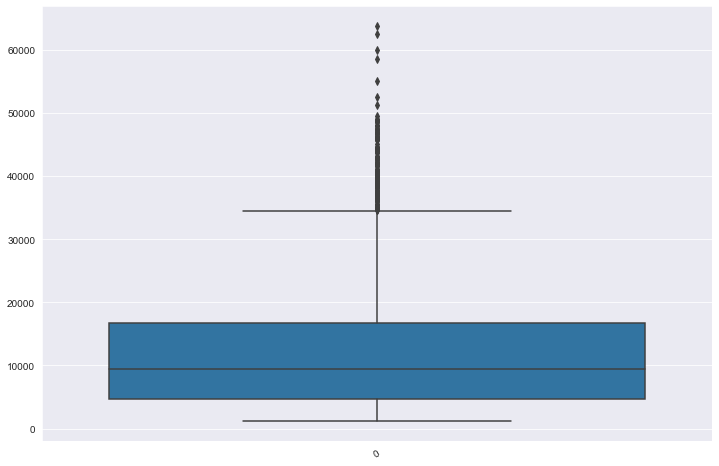

In [15]:
sns.set_style('darkgrid') 
plt.subplots(figsize=(12, 8))
ax=sns.boxplot(data = data["expenses"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);
plt.show()

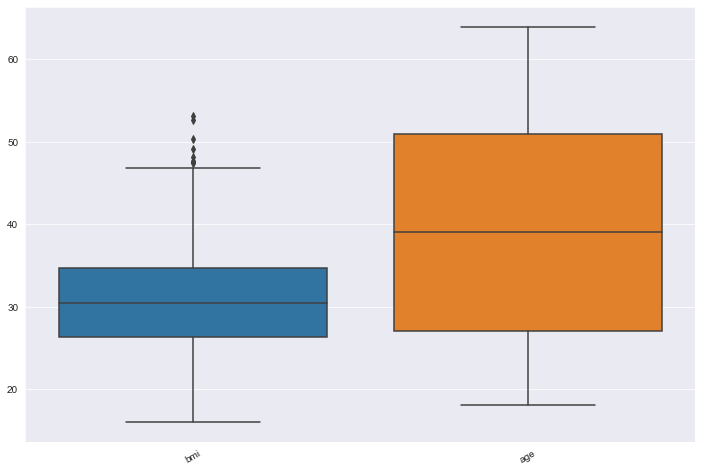

In [16]:
sns.set_style('darkgrid') 
plt.subplots(figsize=(12, 8))
ax=sns.boxplot(data = data[["bmi","age"]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);
plt.show()

In [17]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(data['bmi'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [47.4, 47.5, 47.6, 47.7, 48.1, 49.1, 50.4, 52.6, 53.1]


# Getting the UNIQUE labels in Categorical variables
And its ValueCounts

In [18]:
# Displaying Unique Value of 'SEX' Column
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [19]:
# Getting Unique Valuecounts of 'SEX' Column
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [20]:
# Displaying Unique Value of 'SMOKER' Column
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [21]:
# Getting Unique Valuecounts of 'SMOKER' Column
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [22]:
# Displaying Unique Value of 'REGION' Column
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [23]:
# Getting Unique Valuecounts of 'REGION' Column
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

# Data Cleaning

In [24]:
# Check the shape for finding duplicates
data.shape

(1338, 7)

In [25]:
# Checking the duplicated values
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [26]:
# Getting the sum of duplicated values
data.duplicated().sum()

1

In [27]:
# Droping the duplicate value
data = data.drop_duplicates()

In [28]:
# Checking the shape after droping the duplicated value
data.shape

(1337, 7)

# Data Visualization

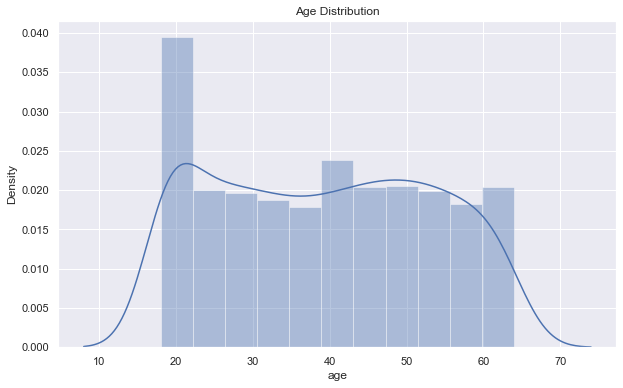

In [29]:
# Distribution of Age Value

sns.set()
plt.figure(figsize=(10,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

Now we See the Distribution the age value is 10 to 70 we have more density in the 
age of 20 & 21 other than that the age is distributed normally

It shows more no of people in our dataset is 20 & 21 age 

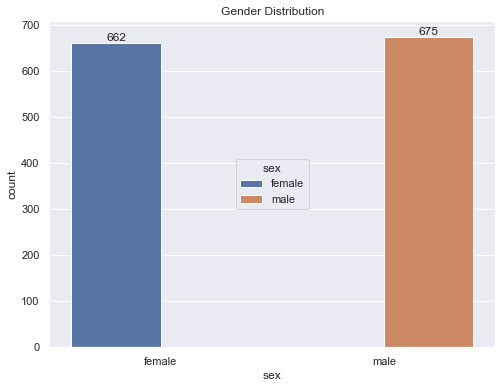

In [30]:
# Gender Column (it is a categorical value so used Countplot to plot it).

plt.figure(figsize=(8,6))
ax=sns.countplot(x='sex',hue='sex',data=data);
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Gender Distribution')
plt.legend(loc='center',title='sex')
plt.show()

It shows that count is almost equal not much difference

In [31]:
# Verifing woth value counts
data['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

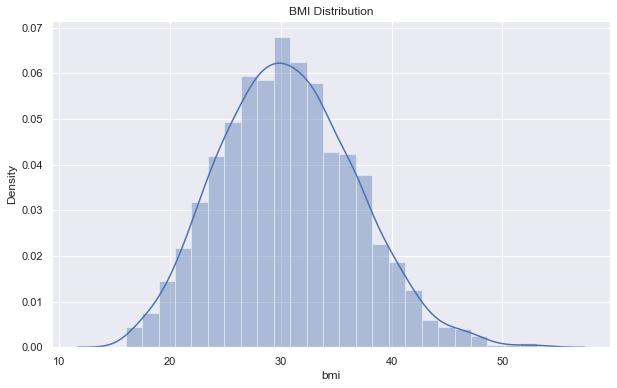

In [32]:
# Distribution of BMI Value

sns.set()
plt.figure(figsize=(10,6))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

It shows that BMI is nearly normally distributed,But normal BMI range for a person is 18.5 to 24.9,it shows the lot people are over weight it can affect a insurance cost

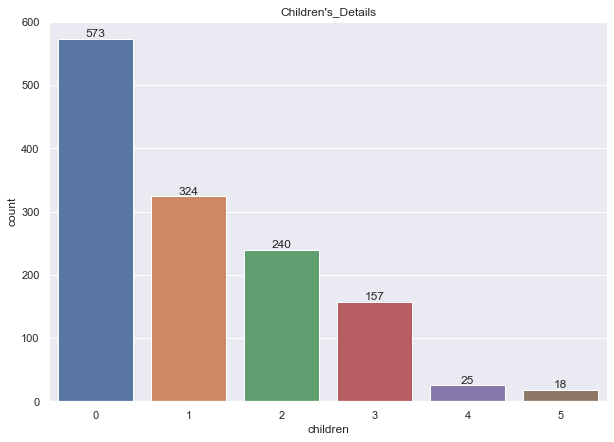

In [33]:
# Children Column

plt.figure(figsize=(10,7))
ax = sns.countplot(x='children',data= data)

ax.bar_label(ax.containers[0])
plt.title("Children's_Details")

plt.show()

This plot shows us people with zero children is more and people have 1&2 is average compared to 1&2
and 3,4,5 are less that this also decides the cost of a insurance

In [34]:
# Verifying with normal count functions
data['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

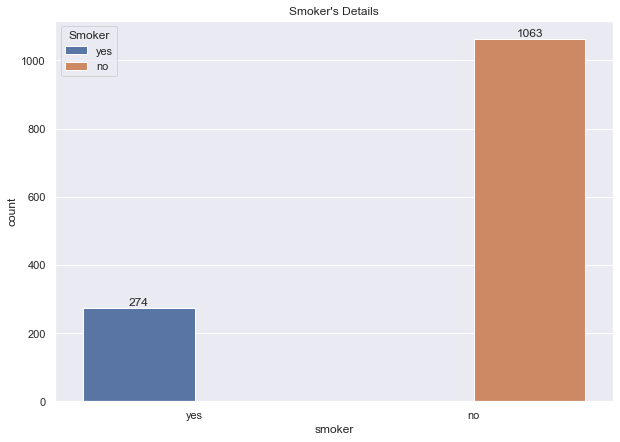

In [35]:
# Smoker Column

plt.figure(figsize=(10,7))
ax = sns.countplot(x='smoker',data= data,hue='smoker')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Smoker's Details")
plt.legend(loc='upper left',title='Smoker')
plt.show()

This plot gives us the correct information of about the people that more number of people are Non-smokers

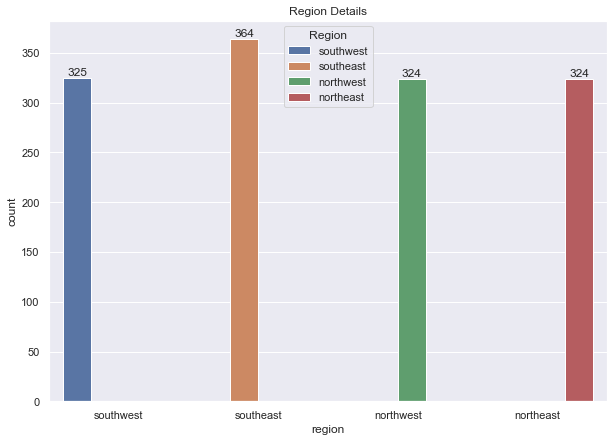

In [36]:
# Region Column

plt.figure(figsize=(10,7))
ax = sns.countplot(x='region',data= data,hue='region')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Region Details")
plt.legend(loc='upper center',title='Region')
plt.show()

This shows we have four regions in that data is nearly normally distrubeted that one region is slightly high tha is SE

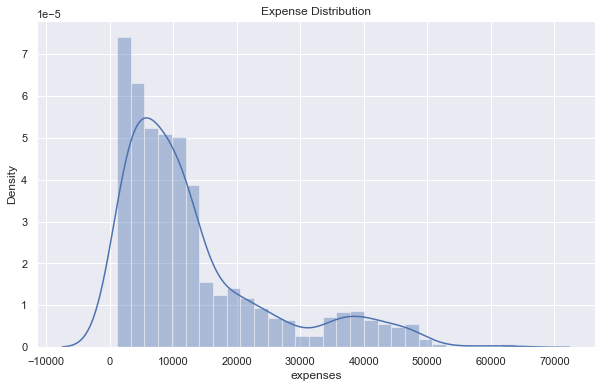

In [37]:
# Distribution of Expenses Value

sns.set()
plt.figure(figsize=(10,6))
sns.distplot(data['expenses'])
plt.title('Expense Distribution')
plt.show()

This Distribution shows us that data is not normally distributed but we have more values in  lower expenses that gives cost is not so to high

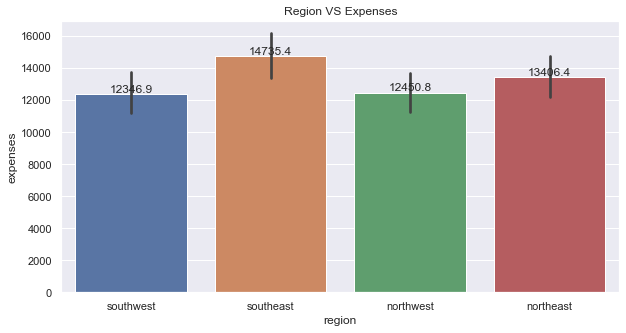

In [38]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='region',y='expenses',data = data)
ax.bar_label(ax.containers[0])
plt.title('Region VS Expenses')
plt.show()

From this we get that SE region people have highest expense than others in this case get to know about is that region can also affect the expenses.

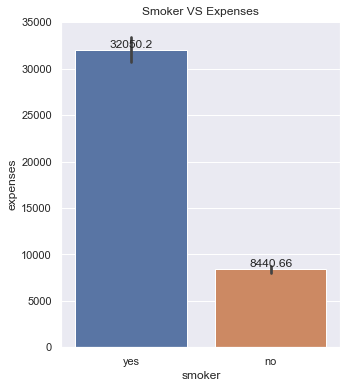

In [39]:
plt.figure(figsize=(5,6))
ax = sns.barplot(x='smoker',y='expenses',data = data)
ax.bar_label(ax.containers[0])
plt.title('Smoker VS Expenses')
plt.show()

This shows that person who smokes that their expense higher.

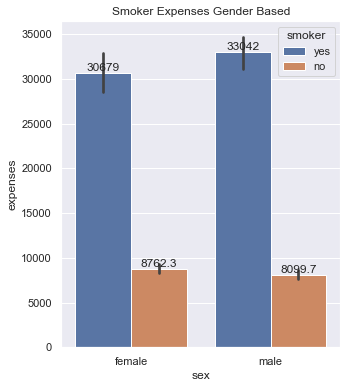

In [40]:
plt.figure(figsize=(5,6))
ax = sns.barplot(x='sex',y='expenses',hue='smoker',data = data)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Smoker Expenses Gender Based')
plt.show()

This plot shows that smoker male has higher expense then female but at the same time non smoker female has slightly higher expense than a non smoker male.

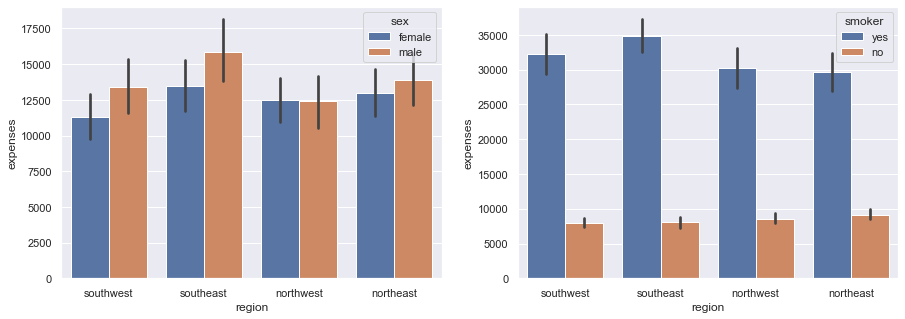

In [41]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.barplot(data.region, data.expenses, hue = data.sex)

ax1 = f.add_subplot(122)
sns.barplot(data.region, data.expenses, hue = data.smoker)
plt.show()

1st Plot shows the previous visualization that SE has higher expense but male has higher expense in most categories

2nd plot shows non smoker in NE has a higher expense compare to others.

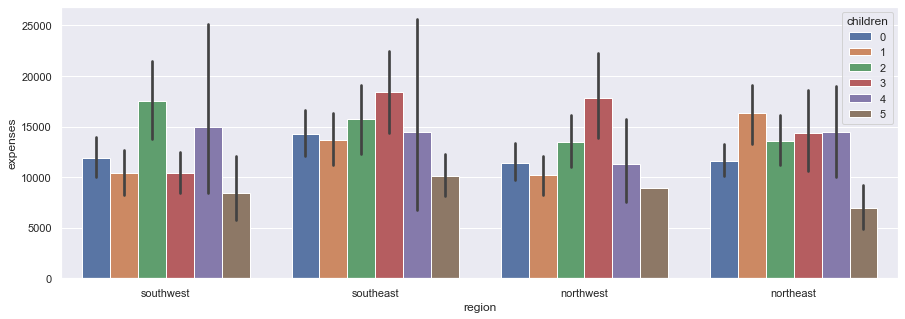

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(data.region, data.expenses, hue = data.children)

plt.show()

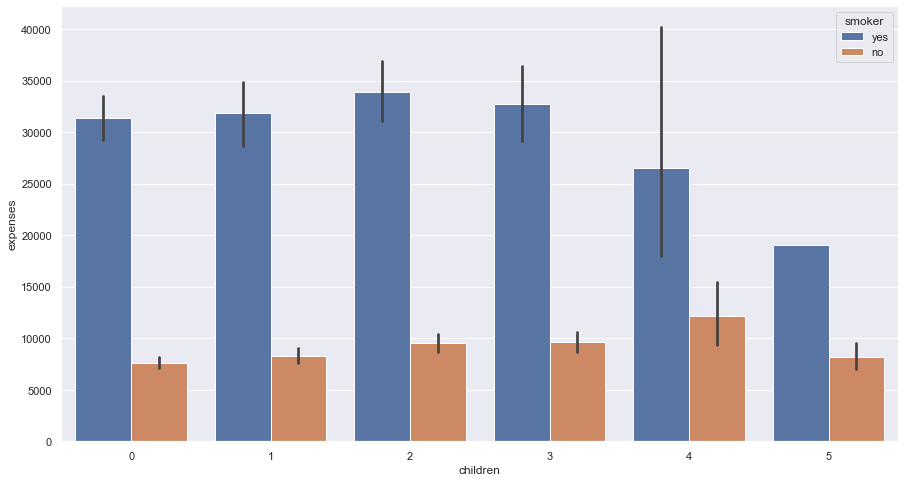

In [43]:
ax1 = f.add_subplot(122)
plt.figure(figsize=(15,8))
sns.barplot(data.children, data.expenses, hue = data.smoker)
for container in ax1.containers:
    ax1.bar_label(container)
plt.show()

# Preprocessing

In [44]:
# Creating a function
def preprocess_inputs(df):
    df = df.copy()

    # Split df into X and Y
    y = df['expenses']
    x = df.drop('expenses', axis=1)

    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.7, shuffle = True, random_state=1)

    return x_train, x_test, y_train, y_test

In [45]:
x_train, x_test, y_train, y_test = preprocess_inputs(data)

In [46]:
x_train

,age,sex,bmi,children,smoker,region
520,50,female,27.4,0,no,northeast
575,58,female,27.2,0,no,northwest
770,61,male,36.1,3,no,southwest
314,27,female,31.4,0,yes,southwest
426,38,female,27.3,1,no,northeast
...,...,...,...,...,...,...
716,49,female,22.6,1,no,northwest
906,27,male,32.6,3,no,northeast
1097,22,male,33.8,0,no,southeast
235,40,female,22.2,2,yes,southeast


In [47]:
y_train

520     25656.58
575     12222.90
770     27941.29
314     34838.87
426      6555.07
          ...   
716      9566.99
906      4846.92
1097     1674.63
235     19444.27
1062    48970.25
Name: expenses, Length: 935, dtype: float64

# Building a Pipeline & Training

In [48]:
# Pipeline Concentrate in categorical columns and scale the data
# Assigning the categorical columns
nominal_features = ['sex', 'smoker', 'region']

# It will transforms the categorical value and skip the binary values
nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse = False, drop = 'if_binary'))
])

# Preprorcessor Tells the model which value to be target
# Passthrough will pass a binary columns it won't drop it
preprocessor = ColumnTransformer(transformers=[
    ('nominal', nominal_transformer, nominal_features)
], remainder='passthrough')

# Building a model by Scaler & pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

model1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

In [49]:
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [50]:
y_pred = model.predict(x_test)

In [51]:
y_pred

array([ 3.66302853e+04,  1.30462853e+04,  1.43902853e+04,  1.22142853e+04,
        1.16382853e+04,  2.51828533e+03,  5.11028533e+03,  1.26622853e+04,
        1.01662853e+04,  3.43262853e+04,  1.06142853e+04,  4.72628533e+03,
        1.09342853e+04,  9.43028533e+03,  3.35028533e+03,  1.36862853e+04,
        3.31828533e+03,  3.26302853e+04,  1.64062853e+04,  1.62462853e+04,
        6.39028533e+03,  1.87422853e+04,  9.20628533e+03,  1.01342853e+04,
        7.19028533e+03,  3.57662853e+04,  9.87828533e+03,  4.05662853e+04,
        6.13428533e+03,  4.08628533e+03,  1.62462853e+04,  4.02228533e+03,
        4.31028533e+03,  1.08702853e+04,  2.64628533e+03,  4.72628533e+03,
        3.01982853e+04,  1.10942853e+04,  1.29182853e+04,  1.13822853e+04,
        3.44222853e+04, -5.85714667e+02,  1.10622853e+04,  3.32702853e+04,
        1.79742853e+04,  1.30462853e+04,  1.57022853e+04,  3.89428533e+03,
        6.58228533e+03,  9.01428533e+03,  1.32382853e+04,  1.25662853e+04,
        1.09982853e+04,  

In [52]:
y_test

629     42983.46
1087    11353.23
283     11879.10
790      5662.23
594      5709.16
          ...   
924      6250.44
873      6849.03
731     10065.41
363      2597.78
10       2721.32
Name: expenses, Length: 402, dtype: float64

In [53]:
# Calculating the error between y-test & y-pred
y_test - y_pred

629     6353.174667
1087   -1693.055333
283    -2511.185333
790    -6552.055333
594    -5929.125333
           ...     
924     1044.154667
873    -1717.255333
731     2459.124667
363      623.494667
10      -372.965333
Name: expenses, Length: 402, dtype: float64

In [54]:
# MEAN
np_m = np.mean((y_test - y_pred)**2)
np_m

36579747.69960588

In [55]:
# RMSE
np.sqrt(np_m)

6048.119352295049

In [56]:
y_test.describe()

count      402.000000
mean     12419.333308
std      11718.219109
min       1137.470000
25%       4435.882500
50%       8901.615000
75%      13829.040000
max      62592.870000
Name: expenses, dtype: float64

In [57]:
# Random Forest
model1.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor())])

In [58]:
y_pred1 = model1.predict(x_test)
y_pred1

array([46862.9422, 12087.1006, 13573.6229,  8400.0076,  7029.6359,
        9041.2226,  2521.7519, 15192.2469, 11999.2293, 24405.9192,
       15211.9968,  8036.122 , 11924.7422, 10361.2086,  1147.2535,
       13926.4907,  5280.7974, 39572.0572, 15339.651 , 20792.4074,
        4435.1076, 16340.7508, 11661.3778, 10540.3313,  6983.3309,
       43936.8793, 10689.2429, 47114.0189,  5217.6271,  3787.797 ,
       10068.5951,  3984.2976,  7830.723 , 19349.0928,  2978.8103,
        2205.859 , 37797.0123, 15724.4959,  8559.5769, 10986.3728,
       25052.9018,  2750.3262, 11445.1056, 41108.2706, 15544.5165,
       12755.9535, 12577.1751,  5405.7932, 10858.9432, 11218.163 ,
       14915.01  , 13982.4248, 15432.87  ,  9463.4937, 15791.7884,
        6001.5837,  4607.6169, 12117.6193,  6871.8614, 14399.2664,
       12129.7008, 16480.7668,  6332.7527,  8595.9623, 11480.9014,
        8914.7651,  2353.9077, 43116.5441, 10610.0179, 17639.8609,
       39733.1636,  5596.5332,  2081.6575,  2863.9903, 10058.9

In [59]:
# Error between this
y_test - y_pred1

629    -3879.4822
1087    -733.8706
283    -1694.5229
790    -2737.7776
594    -1320.4759
          ...    
924    -2065.5257
873    -1272.0180
731    -1812.0377
363     -504.9605
10        24.5062
Name: expenses, Length: 402, dtype: float64

In [60]:
# MEAN
np_r = np.mean((y_test - y_pred1)**2)
np_r

22906572.54478253

In [61]:
# RMSE(RF)
rmse = np.sqrt(np_r)
rmse

4786.081126013487

In [62]:
y_train.mean()

13648.78464171123

In [63]:
y_test.mean()

12419.333308457713

In [64]:
# Error between ytest & ytest mean and squaring it
yt_m = ((y_test - y_test.mean())**2)
yt_m

629     9.341658e+08
1087    1.136576e+06
283     2.918520e+05
790     4.565845e+07
594     4.502643e+07
            ...     
924     3.805524e+07
873     3.102828e+07
731     5.540955e+06
363     9.646291e+07
10      9.405146e+07
Name: expenses, Length: 402, dtype: float64

In [65]:
# Sum of the squared error for baseline model
yt1 = np.sum(yt_m)
yt1

55063980289.455696

In [66]:
# Error for our model
yt_m1 = ((y_test - y_pred1)**2)
yt_m1

629     1.505038e+07
1087    5.385661e+05
283     2.871408e+06
790     7.495426e+06
594     1.743657e+06
            ...     
924     4.266396e+06
873     1.618030e+06
731     3.283481e+06
363     2.549851e+05
10      6.005538e+02
Name: expenses, Length: 402, dtype: float64

In [67]:
# Sum of the squared error for our model
yt2 = np.sum(yt_m1)
yt2

9208442163.002579

In [68]:
# R-Squared Error
R2 = 1-(yt2/yt1)
R2

0.8327683157919857

In [69]:
print('ROOT MEAN SQUARED ERROR VALUE : {:.2f}'.format(rmse))


print('R-SQUARED VALUE : {:.5f}'.format(R2))

ROOT MEAN SQUARED ERROR VALUE : 4786.08
R-SQUARED VALUE : 0.83277


In [70]:
import pickle
filename = 'Insurance_model.pkl'
pickle.dump(model1, open(filename, 'wb'))

# INTERACTIVE WIDGETS

In [71]:
x_train

,age,sex,bmi,children,smoker,region
520,50,female,27.4,0,no,northeast
575,58,female,27.2,0,no,northwest
770,61,male,36.1,3,no,southwest
314,27,female,31.4,0,yes,southwest
426,38,female,27.3,1,no,northeast
...,...,...,...,...,...,...
716,49,female,22.6,1,no,northwest
906,27,male,32.6,3,no,northeast
1097,22,male,33.8,0,no,southeast
235,40,female,22.2,2,yes,southeast


In [72]:
{column : list(x_train[column].unique()) for column in x_train.select_dtypes('object').columns}

{'sex': ['female', 'male'],
 'smoker': ['no', 'yes'],
 'region': ['northeast', 'northwest', 'southwest', 'southeast']}

In [73]:
x_train.describe()

,age,bmi,children
count,935.000000,935.000000,935.000000
mean,39.245989,30.620642,1.094118
std,13.985363,5.972692,1.194078
min,18.000000,16.000000,0.000000
25%,27.000000,26.300000,0.000000
50%,39.000000,30.300000,1.000000
75%,51.000000,34.600000,2.000000
max,64.000000,53.100000,5.000000


In [74]:
widgets.IntSlider()

IntSlider(value=0)

In [75]:
widgets.FloatSlider()

FloatSlider(value=0.0)

In [76]:
widgets.ToggleButtons()

ToggleButtons(options=(), value=None)

In [77]:
widgets.IntSlider(
    value = 18,
    min = 10,
    max = 60,
    step = 1,
    description = 'AGE:'
)

IntSlider(value=18, description='AGE:', max=60, min=10)

In [78]:
widgets.FloatSlider(
    value = 30,
    min = 15,
    max = 54,
    step = 0.01,
    description = 'BMI: ' 
)

FloatSlider(value=30.0, description='BMI: ', max=54.0, min=15.0, step=0.01)

In [79]:
widgets.IntSlider(
    value = 1,
    min = 0,
    max = 10,
    step = 1,
    description ="CHILDREN'S:" 
)

IntSlider(value=1, description="CHILDREN'S:", max=10)

In [80]:
widgets.ToggleButtons(
    options = ['female','male'],
    description = 'SEX: '
)

ToggleButtons(description='SEX: ', options=('female', 'male'), value='female')

In [81]:
widgets.ToggleButtons(
    options = ['no','yes'],
    description = 'SMOKER: '
)

ToggleButtons(description='SMOKER: ', options=('no', 'yes'), value='no')

In [82]:
widgets.Dropdown(
    options = ['northwest', 'southwest', 'northeast', 'southeast'],
    description = 'REGION: '
)

Dropdown(description='REGION: ', options=('northwest', 'southwest', 'northeast', 'southeast'), value='northwes…

In [83]:
Age_widget = widgets.IntSlider(
    value = 18,
    min = 10,
    max = 60,
    step = 1,
    description = 'AGE:'
)

Bmi_widget = widgets.FloatSlider(
    value = 30,
    min = 15,
    max = 54,
    step = 0.01,
    description = 'BMI: ' 
)


Childrens_widget = widgets.IntSlider(
    value = 1,
    min = 0,
    max = 10,
    step = 1,
    description ="CHILDREN'S:" 
)


Sex_widget = widgets.ToggleButtons(
    options = ['female','male'],
    description = 'SEX: '
)


Smoker_widget = widgets.ToggleButtons(
    options = ['no','yes'],
    description = 'SMOKER: '
)


Region_widget = widgets.Dropdown(
    options = ['northwest', 'southwest', 'northeast', 'southeast'],
    description = 'REGION: '
)



widgets.Button(
    description = 'Predict'
)

Button_widget = widgets.Button(
    description = 'Predict'
)

prediction_out = widgets.Output()


def make_prediction(btn):
  x = pd.DataFrame({
      'age':      Age_widget.value,
      'sex':      Sex_widget.value,
      'bmi':      Bmi_widget.value,
      'children': Childrens_widget.value,
      'smoker':   Smoker_widget.value,
      'region':   Region_widget.value
  },index = [0])

  prediction = model1.predict(x)

  with prediction_out:
    prediction_out.clear_output()
    print('Your Insurance Premium Per Year is Rs:',format(prediction[0]))



Button_widget.on_click(make_prediction)

In [84]:
Age_widget

IntSlider(value=18, description='AGE:', max=60, min=10)

In [85]:
Bmi_widget

FloatSlider(value=30.0, description='BMI: ', max=54.0, min=15.0, step=0.01)

In [86]:
Childrens_widget

IntSlider(value=1, description="CHILDREN'S:", max=10)

In [87]:
Sex_widget

ToggleButtons(description='SEX: ', options=('female', 'male'), value='female')

In [88]:
Smoker_widget

ToggleButtons(description='SMOKER: ', options=('no', 'yes'), value='no')

In [89]:
Region_widget

Dropdown(description='REGION: ', options=('northwest', 'southwest', 'northeast', 'southeast'), value='northwes…

In [90]:
Button_widget

Button(description='Predict', style=ButtonStyle())

In [91]:
prediction_out

Output()

display(Age_widget)


display(Bmi_widget)


display(Childrens_widget)


display(Sex_widget)


display(Smoker_widget)


display(Region_widget)


display(Button_widget, prediction_out)

In [92]:
display(Age_widget,'',Bmi_widget,'',Childrens_widget,'', Sex_widget,'', Smoker_widget,'', Region_widget,'', Button_widget,'', prediction_out)

IntSlider(value=18, description='AGE:', max=60, min=10)

''

FloatSlider(value=30.0, description='BMI: ', max=54.0, min=15.0, step=0.01)

''

IntSlider(value=1, description="CHILDREN'S:", max=10)

''

ToggleButtons(description='SEX: ', options=('female', 'male'), value='female')

''

ToggleButtons(description='SMOKER: ', options=('no', 'yes'), value='no')

''

Dropdown(description='REGION: ', options=('northwest', 'southwest', 'northeast', 'southeast'), value='northwes…

''

Button(description='Predict', style=ButtonStyle())

''

Output()